[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rbg-research/AI-Training/blob/main/python/Pandas/Advanced_Pandas%20.ipynb)

# Python | Pandas

In this notebook we will get a brief insight on some of the advanced concepts in pandas dataframe:
1. Pandas .head() method
2. Pandas .describe() method
3. Dealing with rows and columns
    * column addition and deletion
    * row addition and deletion
4. Boolean Indexing in Pandas
5. Pandas GroupBy
6. Applying functions to group
    * Aggregation
    * Transformation
    * Filteration
7. Pandas Merging, Joining, and Concatenating 

# 1. Dataframe/Series.head() method

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Pandas head() method is used to return top n (5 by default) rows of a data frame or series.



In [3]:
# example for using head() ,method in dataframe
# importing pandas module
import pandas as pd
  
# making data frame
data = pd.read_csv("sample.csv")
  
# calling head() method 
# storing in new variable
data_top = data.head()
  
# display
data_top

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


Calling on Series with n parameter()

In this example, the .head() method is called on series with custom input of n parameter to return top 9 rows of the series.

In [5]:
# example for using head() method in Series
# importing pandas module
import pandas as pd
  
# making data frame
data = pd.read_csv("sample.csv")
  
# number of rows to return
n = 9
  
# creating series
series = data["Name"]
  
# returning top n rows
top = series.head(n = n)
  
# display
top

0    Avery Bradley
1      Jae Crowder
2     John Holland
3      R.J. Hunter
4    Jonas Jerebko
5     Amir Johnson
6    Jordan Mickey
7     Kelly Olynyk
8     Terry Rozier
Name: Name, dtype: object

# 2. DataFrame.describe() method

Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.

In [9]:
# importing pandas module
import pandas as pd
  
# making data frame
data = pd.read_csv("sample.csv")
  
# calling .describe() method 
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


Describing series of strings. In the following example the describe method is called by the "Name" column to see the behaviour with object data type.

In [10]:
# importing pandas module 
import pandas as pd 
  
# importing regex module
import re
    
# making data frame 
data = pd.read_csv("sample.csv") 
    
# removing null values to avoid errors 
data.dropna(inplace = True) 
  
# calling describe method
describe = data["Name"].describe()
  
# display
describe

count               364
unique              364
top       Avery Bradley
freq                  1
Name: Name, dtype: object

# 3. Dealing with Rows and Columns in Pandas DataFrame

In the previous notebook we have already seen column slection and row selection. Here we are going to see 
* column addition
* column deletion 
* row addition
* row deletion

# Column Addition
In Order to add a column in Pandas DataFrame, we can declare a new list as a column and add to a existing Dataframe.




In [11]:
# Import pandas package 
import pandas as pd
  
# Define a dictionary containing Students data
data = {'Name': ['Jai', 'Barathi', 'Mano', 'Kamal'],
        'Height': [5.1, 6.2, 5.1, 5.2],
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']}
  
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
  
# Declare a list that is to be converted into a column
address = ['Delhi', 'Bangalore', 'Chennai', 'Coimbatore']
  
# Using 'Address' as the column name
# and equating it to the list
df['Address'] = address
  
# Observe the result
print(df)

      Name  Height Qualification     Address
0      Jai     5.1           Msc       Delhi
1  Barathi     6.2            MA   Bangalore
2     Mano     5.1           Msc     Chennai
3    Kamal     5.2           Msc  Coimbatore


# Column Deletion
In Order to delete a column in Pandas DataFrame, we can use the drop() method. Columns is deleted by dropping columns with column names.

In [13]:
# importing pandas module
import pandas as pd
  
# making data frame from csv file
data = pd.read_csv("sample.csv", index_col ="Name" )
  
# dropping passed columns
data.drop(["Team", "Weight"], axis = 1, inplace = True) # inplace will make cahnges in original csv file
  
# display
print(data)

               Number Position   Age Height            College     Salary
Name                                                                     
Avery Bradley     0.0       PG  25.0    6-2              Texas  7730337.0
Jae Crowder      99.0       SF  25.0    6-6          Marquette  6796117.0
John Holland     30.0       SG  27.0    6-5  Boston University        NaN
R.J. Hunter      28.0       SG  22.0    6-5      Georgia State  1148640.0
Jonas Jerebko     8.0       PF  29.0   6-10                NaN  5000000.0
...               ...      ...   ...    ...                ...        ...
Shelvin Mack      8.0       PG  26.0    6-3             Butler  2433333.0
Raul Neto        25.0       PG  24.0    6-1                NaN   900000.0
Tibor Pleiss     21.0        C  26.0    7-3                NaN  2900000.0
Jeff Withey      24.0        C  26.0    7-0             Kansas   947276.0
NaN               NaN      NaN   NaN    NaN                NaN        NaN

[458 rows x 6 columns]


# Row Addition
In Order to add a Row in Pandas DataFrame, we can concat the old dataframe with new one.

In [17]:
# importing pandas module 
import pandas as pd 
    
# making data frame 
df = pd.read_csv("sample.csv", index_col ="Name") 
  
df.head(10)
  
new_row = pd.DataFrame({'Name':'RBG', 'Team':'AI', 'Number':3,
                        'Position':'PG', 'Age':33, 'Height':'6-2',
                        'Weight':189, 'College':'MIT', 'Salary':99999},
                                                            index =[0])
# simply concatenate both dataframes
df = pd.concat([new_row, df]).reset_index(drop = True)
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,RBG,AI,3.0,PG,33.0,6-2,189.0,MIT,99999.0
1,NaN,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
2,NaN,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,NaN,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
4,NaN,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0


# Row Deletion:
In Order to delete a row in Pandas DataFrame, we can use the drop() method. Rows is deleted by dropping Rows by index label.

In [21]:
# importing pandas module
import pandas as pd
  
# making data frame from csv file
data = pd.read_csv("sample.csv", index_col ="Name" )

# dropping passed values
data.drop(["Avery Bradley", "John Holland", "R.J. Hunter",
                            "R.J. Hunter"], inplace = True)
  
# display
data

,Team,Number,Position,Age,Height,Weight,College,Salary
Name,,,,,,,,
Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...
Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


# 4. Boolean Indexing in Pandas

In boolean indexing, we will select subsets of data based on the actual values of the data in the DataFrame and not on their row/column labels or integer locations. In boolean indexing, we use a boolean vector to filter the data. 

Boolean indexing is a type of indexing which uses actual values of the data in the DataFrame. In boolean indexing, we can filter a data in four ways – 
* Accessing a DataFrame with a boolean index
* Applying a boolean mask to a dataframe
* Masking data based on column value
* Masking data based on an index value

1. Accessing a DataFrame with a boolean index : 
In order to access a dataframe with a boolean index, we have to create a dataframe in which the index of dataframe contains a boolean value that is “True” or “False”. For Example 

In [30]:
# importing pandas as pd
import pandas as pd
  
# dictionary of lists
dict = {'name':["jai", "barathi", "manogaran", "kamal"],
        'degree': ["MBA", "BCA", "M.Tech", "MBA"],
        'score':[90, 40, 80, 98]}
  
df = pd.DataFrame(dict, index = [True, False, True, False])
  
print(df)

# accessing a dataframe using loc[] function
print("\nDisplaying the values of true using .loc[]")
print(df.loc[True]) 

# accessing a dataframe using .iloc[] function
print("\nDisplaying the values using .iloc[]")
print(df.iloc[1]) # we can't use true and false index in iloc[]

            name  degree  score
True         jai     MBA     90
False    barathi     BCA     40
True   manogaran  M.Tech     80
False      kamal     MBA     98

Displaying the values of true using .loc[]
           name  degree  score
True        jai     MBA     90
True  manogaran  M.Tech     80

Displaying the values of false using .iloc[]
name      barathi
degree        BCA
score          40
dtype: object


2. Applying a boolean mask to a dataframe : 
In a dataframe we can apply a boolean mask in order to do that we, can use __getitems__ or [] accessor. We can apply a boolean mask by giving a list of True and False of the same length as contain in a dataframe. When we apply a boolean mask it will print only that dataframe in which we pass a boolean value True

In [31]:
# importing pandas as pd
import pandas as pd
  
# dictionary of lists
dict = {'name':["jai", "barathi", "kamal", "mano"],
        'degree': ["MBA", "BCA", "M.Tech", "MBA"],
        'score':[90, 40, 80, 98]}
  
df = pd.DataFrame(dict, index = [0, 1, 2, 3])
  
 
 
print(df[[True, False, True, False]])

    name  degree  score
0    jai     MBA     90
2  kamal  M.Tech     80


3. Masking data based on column value : 
In a dataframe we can filter a data based on a column value in order to filter data, we can apply certain conditions on the dataframe using different operators like ==, >, <, <=, >=. When we apply these operators to the dataframe then it produces a Series of True and False.

In [32]:
# importing pandas as pd
import pandas as pd
  
# dictionary of lists
dict = {'name':["jai", "barathi", "kamal", "mano"],
        'degree': ["BCA", "BCA", "M.Tech", "BCA"],
        'score':[90, 40, 80, 98]}
 
# creating a dataframe
df = pd.DataFrame(dict)
  
# using a comparison operator for filtering of data
print(df['degree'] == 'BCA')

0     True
1     True
2    False
3     True
Name: degree, dtype: bool


4. Masking data based on index value : 
In a dataframe we can filter a data based on a column value in order to filter data, we can create a mask based on the index values using different operators like ==, >, <, etc… 

In [36]:
# importing pandas as pd
import pandas as pd
  
# dictionary of lists
dict = {'name':["jai", "barathi", "kamal", "mano"],
        'degree': ["BCA", "BCA", "M.Tech", "BCA"],
        'score':[90, 40, 80, 98]}
  
 
df = pd.DataFrame(dict, index = [0, 1, 2, 3])
 
mask = df.index == 0  # ypou can change the index
 
print(df[mask])

  name degree  score
0  jai    BCA     90


# 5. Pandas GroupBy
Groupby is a pretty simple concept. We can create a grouping of categories and apply a function to the categories. It’s a simple concept but it’s an extremely valuable technique that’s widely used in data science. 
Groupby mainly refers to a process involving one or more of the following steps they are:
* Splitting : It is a process in which we split data into group by applying some conditions on datasets.
* Applying : It is a process in which we apply a function to each group independently
* Combining : It is a process in which we combine different datasets after applying groupby and results into a data structure

Splitting Data into Groups


Splitting is a process in which we split data into a group by applying some conditions on datasets. In order to split the data, we apply certain conditions on datasets. In order to split the data, we use groupby() function this function is used to split the data into groups based on some criteria.Pandas datasets can be split into any of their objects. There are multiple ways to split data like:
* obj.groupby(key)
* obj.groupby(key, axis=1)
* obj.groupby([key1, key2])


1. Grouping data with one key:
In order to group data with one key, we pass only one key as an argument in groupby function.

In [42]:
# importing pandas module
import pandas as pd 
   
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'ram', 'Jai', 'barathi', 
                 'kamal', 'kishore', 'barathi', 'mano'], 
        'Age':[27, 24, 22, 32, 
               33, 36, 27, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA']} 
     
   
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
   
print(df) 

      Name  Age    Address Qualification
0      Jai   27     Nagpur           Msc
1      ram   24     Kanpur            MA
2      Jai   22  Allahabad           MCA
3  barathi   32    Kannuaj           Phd
4    kamal   33    Jaunpur        B.Tech
5  kishore   36     Kanpur         B.com
6  barathi   27  Allahabad           Msc
7     mano   32    Aligarh            MA


Now we group a data of Name using groupby() function.




In [39]:
# using groupby function
# with one key
  
df.groupby('Name')
print(df.groupby('Name').groups)

{'Jai': [0, 2], 'barathi': [3, 6], 'kamal': [4], 'kishore': [5], 'mano': [7], 'ram': [1]}


Now we print the first entries in all the groups formed.




In [40]:
# applying groupby() function to 
# group the data on Name value. 
gk = df.groupby('Name') 
    
# Let's print the first entries 
# in all the groups formed. 
gk.first() 

,Age,Address,Qualification
Name,,,
Jai,27,Nagpur,Msc
barathi,32,Kannuaj,Phd
kamal,33,Jaunpur,B.Tech
kishore,36,Kanpur,B.com
mano,32,Aligarh,MA
ram,24,Kanpur,MA


Grouping data with multiple keys

In [43]:
# Using multiple keys in
# groupby() function
df.groupby(['Name', 'Qualification'])
  
print(df.groupby(['Name', 'Qualification']).groups)

{('Jai', 'MCA'): [2], ('Jai', 'Msc'): [0], ('barathi', 'Msc'): [6], ('barathi', 'Phd'): [3], ('kamal', 'B.Tech'): [4], ('kishore', 'B.com'): [5], ('mano', 'MA'): [7], ('ram', 'MA'): [1]}


Grouping data by sorting keys :
Group keys are sorted by default uring the groupby operation. User can pass sort=False for potential speedups.

In [44]:
# importing pandas module
import pandas as pd 
   
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'mano', 'Jai', 'kamal', 
                 'Gaurav', 'mano', 'kamal', 'Abhi'], 
        'Age':[27, 24, 22, 32, 
               33, 36, 27, 32], } 
     
   
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
   
print(df) 

     Name  Age
0     Jai   27
1    mano   24
2     Jai   22
3   kamal   32
4  Gaurav   33
5    mano   36
6   kamal   27
7    Abhi   32


Now we apply groupby() without sort

In [45]:
# using groupby function
# without using sort
  
df.groupby(['Name']).sum()

,Age
Name,
Abhi,32
Gaurav,33
Jai,49
kamal,59
mano,60


Now we apply groupby() using sort in order to attain potential speedups

In [46]:
# using groupby function
# with sort
  
df.groupby(['Name'], sort = False).sum()

,Age
Name,
Jai,49
mano,60
kamal,59
Gaurav,33
Abhi,32


# 6. Applying functions to group

After splitting the group we apply functions to each group such as
* Aggregation 
* Transformation  
* Filtration 

# Aggregation

It is a process in which we compute a summary statistic (or statistics) about each group. For Example, Compute group sums ormeans.

In [50]:

# importing pandas module
import pandas as pd 
  
# importing numpy as np
import numpy as np
   
# Define a dictionary cont# using different aggregation
# function by passing dictionary
# to aggregate
grp = df.groupby('Name')
  
grp.agg({'Age' : 'sum', 'Score' : 'std'})aining employee data 
data1 = {'Name':['Jai', 'barahi', 'Jai', 'kamal', 
                 'Gaurav', 'barathi', 'kamal', 'mano'], 
        'Age':[27, 24, 22, 32, 
               33, 36, 27, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA']} 
     process
   
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
   
print(df) 

      Name  Age    Address Qualification
0      Jai   27     Nagpur           Msc
1   barahi   24     Kanpur            MA
2      Jai   22  Allahabad           MCA
3    kamal   32    Kannuaj           Phd
4   Gaurav   33    Jaunpur        B.Tech
5  barathi   36     Kanpur         B.com
6    kamal   27  Allahabad           Msc
7     mano   32    Aligarh            MA


In [51]:
# performing aggregation using
# aggregate method
  
grp1 = df.groupby('Name')
  
grp1.aggregate(np.sum)

,Age
Name,
Gaurav,33
Jai,49
barahi,24
barathi,36
kamal,59
mano,32


In [52]:
# applying a function by passing
# a list of functions
  
grp = df.groupby('Name')
  
grp['Age'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Name,,,
Gaurav,33,33.0,NaN
Jai,49,24.5,3.535534
barahi,24,24.0,NaN
barathi,36,36.0,NaN
kamal,59,29.5,3.535534
mano,32,32.0,NaN


# Transformation

It is a process in which we perform some group-specific computations and return a like-indexed. For Example, Filling NAs within groups with a value derived from each group.

In [54]:
# importing pandas module
import pandas as pd 
  
# importing numpy as np
import numpy as np
   
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'barathi', 'Jai', 'kamal', 
                 'Gaurav', 'barathi', 'kamal', 'mano'], 
        'Age':[27, 24, 22, 32, 
               33, 36, 27, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA'],
        'Score': [23, 34, 35, 45, 47, 50, 52, 53]} 
     
   
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
   
print(df) 

      Name  Age    Address Qualification  Score
0      Jai   27     Nagpur           Msc     23
1  barathi   24     Kanpur            MA     34
2      Jai   22  Allahabad           MCA     35
3    kamal   32    Kannuaj           Phd     45
4   Gaurav   33    Jaunpur        B.Tech     47
5  barathi   36     Kanpur         B.com     50
6    kamal   27  Allahabad           Msc     52
7     mano   32    Aligarh            MA     53


Now we perform some group-specific computations and return a like-indexed.

Note : we apply lambda function here, generally in python we use it as an argument to a higher-order function (a function that takes in other functions as arguments).

In [56]:
# using transform function
grp = df.groupby('Name')
sc = lambda x: (x - x.mean()) / x.std()*10  # we apply lambda function
grp.transform(sc)

<ipython-input-56-ee63891a3c36>:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  grp.transform(sc)


,Age,Score
0,7.071068,-7.071068
1,-7.071068,-7.071068
2,-7.071068,7.071068
3,7.071068,-7.071068
4,NaN,NaN
5,7.071068,7.071068
6,-7.071068,7.071068
7,NaN,NaN


# Filtration :
Filtration is a process in which we discard some groups, according to a group-wise computation that evaluates True or False. In order to filter a group, we use filter method and apply some condition by which we filter group

In [57]:
# importing pandas module
import pandas as pd 
  
# importing numpy as np
import numpy as np
   
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'barathi', 'Jai', 'kamal', 
                 'Gaurav', 'barathi', 'kamal', 'mano'], 
        'Age':[27, 24, 22, 32, 
               33, 36, 27, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA'],
        'Score': [23, 34, 35, 45, 47, 50, 52, 53]} 
     
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
   
print(df) 

      Name  Age    Address Qualification  Score
0      Jai   27     Nagpur           Msc     23
1  barathi   24     Kanpur            MA     34
2      Jai   22  Allahabad           MCA     35
3    kamal   32    Kannuaj           Phd     45
4   Gaurav   33    Jaunpur        B.Tech     47
5  barathi   36     Kanpur         B.com     50
6    kamal   27  Allahabad           Msc     52
7     mano   32    Aligarh            MA     53


Now we filter data that to return the Name which have lived two or more times .

In [58]:
# filtering data using
# filter data
grp = df.groupby('Name')
grp.filter(lambda x: len(x) >= 2)

,Name,Age,Address,Qualification,Score
0,Jai,27,Nagpur,Msc,23
1,barathi,24,Kanpur,MA,34
2,Jai,22,Allahabad,MCA,35
3,kamal,32,Kannuaj,Phd,45
5,barathi,36,Kanpur,B.com,50
6,kamal,27,Allahabad,Msc,52


# 7. Pandas Merging, Joining, and Concatenating
In order to concat dataframe, we use concat() function which helps in concatenating a dataframe. We can concat a dataframe in many different ways, they are:

* Concatenating DataFrame using .concat()
* Concatenating DataFrame by setting logic on axes
* Concatenating DataFrame using .append()
* Concatenating DataFrame by ignoring indexes
* Concatenating DataFrame with group keys
* Concatenating with mixed ndims


1. Concatenating DataFrame using .concat() :

In [59]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'barathi', 'mano', 'kamal'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd']} 
   
# Define a dictionary containing employee data 
data2 = {'Name':['Abhi', 'kishore', 'siva', 'jithu'], 
        'Age':[17, 14, 12, 52], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2, index=[4, 5, 6, 7])
 
print(df, "\n\n", df1) 

      Name  Age    Address Qualification
0      Jai   27     Nagpur           Msc
1  barathi   24     Kanpur            MA
2     mano   22  Allahabad           MCA
3    kamal   32    Kannuaj           Phd 

       Name  Age    Address Qualification
4     Abhi   17     Nagpur         Btech
5  kishore   14     Kanpur           B.A
6     siva   12  Allahabad          Bcom
7    jithu   52    Kannuaj        B.hons


Now we apply .concat function in order to concat two dataframe

In [62]:
# using a .concat() method
conc = [df, df1]
res = pd.concat(conc)
res

,Name,Age,Address,Qualification
0,Jai,27,Nagpur,Msc
1,barathi,24,Kanpur,MA
2,mano,22,Allahabad,MCA
3,kamal,32,Kannuaj,Phd
4,Abhi,17,Nagpur,Btech
5,kishore,14,Kanpur,B.A
6,siva,12,Allahabad,Bcom
7,jithu,52,Kannuaj,B.hons


2. Concatenating DataFrame by setting logic on axes :

In order to concat dataframe, we have to set different logic on axes. We can set axes in the following three ways:
* Taking the union of them all, join='outer'. This is the default option as it results in zero information loss.
* Taking the intersection, join='inner'.
* Use a specific index, as passed to the join_axes argument

In [67]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 
   
# Define a dictionary containing employee data 
data2 = {'Name':['Abhi', 'Ganesh', 'Kishore', 'Siva'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
 
print(df, "\n\n", df1) 

      Name  Age    Address Qualification  Mobile No
0      Jai   27     Nagpur           Msc         97
1  Barathi   24     Kanpur            MA         91
2     Mano   22  Allahabad           MCA         58
3    Kamal   32    Kannuaj           Phd         76 

       Name  Age    Address Qualification  Salary
2     Abhi   22  Allahabad           MCA    1000
3   Ganesh   32    Kannuaj           Phd    2000
6  Kishore   12  Allahabad          Bcom    3000
7     Siva   52    Kannuaj        B.hons    4000


In [69]:
# applying concat with axes
# join = 'inner'
res = pd.concat([df, df1], axis=1, join='inner')
res

,Name,Age,Address,Qualification,Mobile No,Name,Age,Address,Qualification,Salary
2,Mano,22,Allahabad,MCA,58,Abhi,22,Allahabad,MCA,1000
3,Kamal,32,Kannuaj,Phd,76,Ganesh,32,Kannuaj,Phd,2000


In [70]:
# using a .concat for
# union of dataframe
res2 = pd.concat([df, df1], axis=1, sort=False)
res2

,Name,Age,Address,Qualification,Mobile No,Name,Age,Address,Qualification,Salary
0,Jai,27.0,Nagpur,Msc,97.0,NaN,NaN,NaN,NaN,NaN
1,Barathi,24.0,Kanpur,MA,91.0,NaN,NaN,NaN,NaN,NaN
2,Mano,22.0,Allahabad,MCA,58.0,Abhi,22.0,Allahabad,MCA,1000.0
3,Kamal,32.0,Kannuaj,Phd,76.0,Ganesh,32.0,Kannuaj,Phd,2000.0
6,NaN,NaN,NaN,NaN,NaN,Kishore,12.0,Allahabad,Bcom,3000.0
7,NaN,NaN,NaN,NaN,NaN,Siva,52.0,Kannuaj,B.hons,4000.0


2. Concatenating DataFrame using .append()

In order to concat a dataframe, we use .append() function this function concatenate along axis=0, namely the index. This function exist before .concat.

In [72]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 
   
# Define a dictionary containing employee data 
data2 = {'Name':['Abhi', 'Ganesh', 'Kishore', 'Siva'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
 
print(df, "\n\n", df1)

      Name  Age    Address Qualification  Mobile No
0      Jai   27     Nagpur           Msc         97
1  Barathi   24     Kanpur            MA         91
2     Mano   22  Allahabad           MCA         58
3    Kamal   32    Kannuaj           Phd         76 

       Name  Age    Address Qualification  Salary
2     Abhi   22  Allahabad           MCA    1000
3   Ganesh   32    Kannuaj           Phd    2000
6  Kishore   12  Allahabad          Bcom    3000
7     Siva   52    Kannuaj        B.hons    4000


In [73]:
# using append function
res = df.append(df1)
res

,Name,Age,Address,Qualification,Mobile No,Salary
0,Jai,27,Nagpur,Msc,97.0,NaN
1,Barathi,24,Kanpur,MA,91.0,NaN
2,Mano,22,Allahabad,MCA,58.0,NaN
3,Kamal,32,Kannuaj,Phd,76.0,NaN
2,Abhi,22,Allahabad,MCA,NaN,1000.0
3,Ganesh,32,Kannuaj,Phd,NaN,2000.0
6,Kishore,12,Allahabad,Bcom,NaN,3000.0
7,Siva,52,Kannuaj,B.hons,NaN,4000.0


3. Concatenating DataFrame by ignoring indexes :

In order to concat a dataframe by ignoring indexes, we ignore index which don’t have a meaningful meaning, you may wish to append them and ignore the fact that they
may have overlapping indexes. In order to do that we use ignore_index as an argument.

In [74]:
# imorting pandas as pd
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 
   
# Define a dictionary containing employee data 
data2 = {'Name':['Abhi', 'Ganesh', 'Kishore', 'Siva'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
 
print(df, "\n\n", df1)

      Name  Age    Address Qualification  Mobile No
0      Jai   27     Nagpur           Msc         97
1  Barathi   24     Kanpur            MA         91
2     Mano   22  Allahabad           MCA         58
3    Kamal   32    Kannuaj           Phd         76 

       Name  Age    Address Qualification  Salary
2     Abhi   22  Allahabad           MCA    1000
3   Ganesh   32    Kannuaj           Phd    2000
6  Kishore   12  Allahabad          Bcom    3000
7     Siva   52    Kannuaj        B.hons    4000


In [75]:
# using ignore_index
res = pd.concat([df, df1], ignore_index=True)
res

,Name,Age,Address,Qualification,Mobile No,Salary
0,Jai,27,Nagpur,Msc,97.0,NaN
1,Barathi,24,Kanpur,MA,91.0,NaN
2,Mano,22,Allahabad,MCA,58.0,NaN
3,Kamal,32,Kannuaj,Phd,76.0,NaN
4,Abhi,22,Allahabad,MCA,NaN,1000.0
5,Ganesh,32,Kannuaj,Phd,NaN,2000.0
6,Kishore,12,Allahabad,Bcom,NaN,3000.0
7,Siva,52,Kannuaj,B.hons,NaN,4000.0


4. Concatenating DataFrame with group keys :

In order to concat dataframe with group keys, we override the column names with the use of the keys argument. Keys argument is to override the column names when creating a new DataFrame based on existing Series.

In [77]:
# imorting pandas as pd
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd'],
        'Mobile No': [97, 91, 58, 76]} 
   
# Define a dictionary containing employee data 
data2 = {'Name':['Abhi', 'Ganesh', 'Kishore', 'Siva'], 
        'Age':[22, 32, 12, 52], 
        'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons'],
        'Salary':[1000, 2000, 3000, 4000]} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=[0, 1, 2, 3])
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2, index=[2, 3, 6, 7]) 
 
print(df, "\n\n", df1)

      Name  Age    Address Qualification  Mobile No
0      Jai   27     Nagpur           Msc         97
1  Barathi   24     Kanpur            MA         91
2     Mano   22  Allahabad           MCA         58
3    Kamal   32    Kannuaj           Phd         76 

       Name  Age    Address Qualification  Salary
2     Abhi   22  Allahabad           MCA    1000
3   Ganesh   32    Kannuaj           Phd    2000
6  Kishore   12  Allahabad          Bcom    3000
7     Siva   52    Kannuaj        B.hons    4000


In [78]:
# using keys 
frames = [df, df1 ]
res = pd.concat(frames, keys=['x', 'y'])
res

Name  Age    Address Qualification  Mobile No  Salary
x 0      Jai   27     Nagpur           Msc       97.0     NaN
  1  Barathi   24     Kanpur            MA       91.0     NaN
  2     Mano   22  Allahabad           MCA       58.0     NaN
  3    Kamal   32    Kannuaj           Phd       76.0     NaN
y 2     Abhi   22  Allahabad           MCA        NaN  1000.0
  3   Ganesh   32    Kannuaj           Phd        NaN  2000.0
  6  Kishore   12  Allahabad          Bcom        NaN  3000.0
  7     Siva   52    Kannuaj        B.hons        NaN  4000.0

5. Concatenating with mixed ndims :

User can concatenate a mix of Series and DataFrame. The Series will be transformed to DataFrame with the column name as the name of the Series.

In [79]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[27, 24, 22, 32], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd']} 
   
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=[0, 1, 2, 3])
 
# creating a series
s1 = pd.Series([1000, 2000, 3000, 4000], name='Salary')
 
print(df, "\n\n", s1)

      Name  Age    Address Qualification
0      Jai   27     Nagpur           Msc
1  Barathi   24     Kanpur            MA
2     Mano   22  Allahabad           MCA
3    Kamal   32    Kannuaj           Phd 

 0    1000
1    2000
2    3000
3    4000
Name: Salary, dtype: int64


In [80]:
# combining series and dataframe
res = pd.concat([df, s1], axis=1)
res

,Name,Age,Address,Qualification,Salary
0,Jai,27,Nagpur,Msc,1000
1,Barathi,24,Kanpur,MA,2000
2,Mano,22,Allahabad,MCA,3000
3,Kamal,32,Kannuaj,Phd,4000


# Merging DataFrame
Pandas provide a single function, merge(), as the entry point for all standard database join operations between DataFrame objects.
There are four basic ways to handle the join (inner, left, right, and outer), depending on which rows must retain their data.

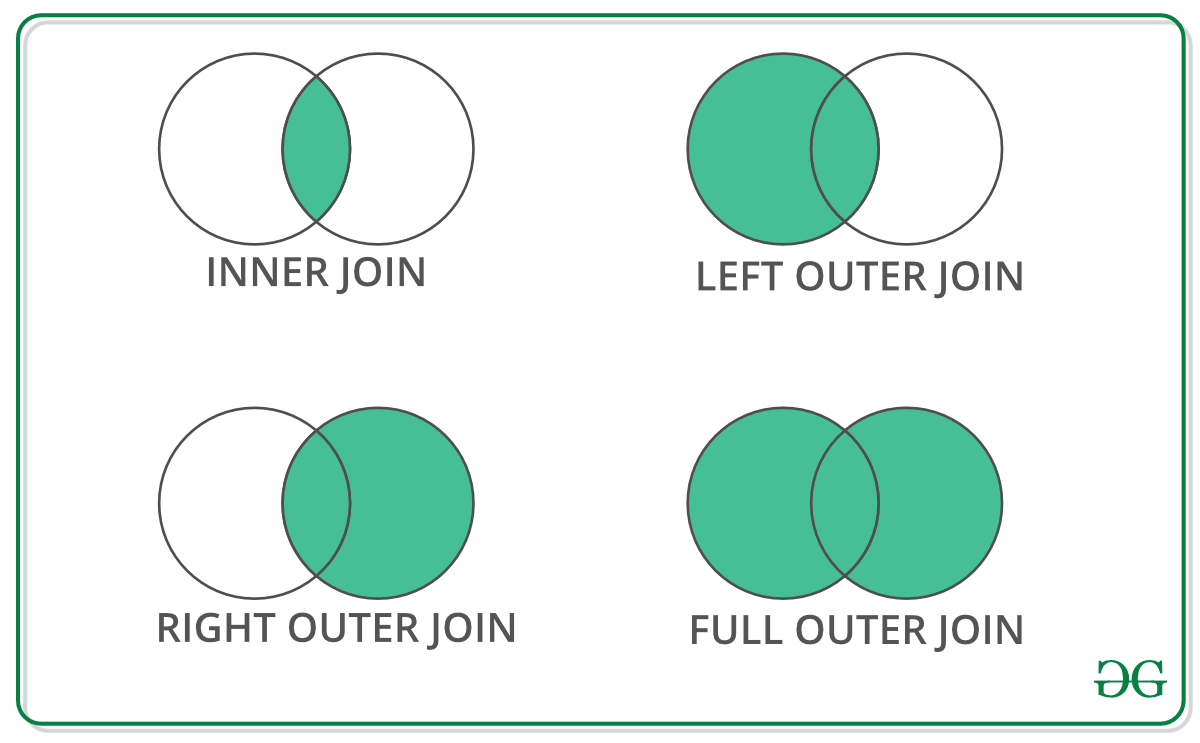
                                                                                  * source : geeksforgeeks

Merging a dataframe with one unique key combination

In [81]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[22, 29, 31, 27],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 
  
 
print(df, "\n\n", df1) 

  key     Name  Age
0  K0      Jai   22
1  K1  Barathi   29
2  K2     Mano   31
3  K3    Kamal   27 

   key    Address Qualification
0  K0     Nagpur         Btech
1  K1     Kanpur           B.A
2  K2  Allahabad          Bcom
3  K3    Kannuaj        B.hons


In [82]:
# using .merge() function
res = pd.merge(df, df1, on='key')
 
res

,key,Name,Age,Address,Qualification
0,K0,Jai,22,Nagpur,Btech
1,K1,Barathi,29,Kanpur,B.A
2,K2,Mano,31,Allahabad,Bcom
3,K3,Kamal,27,Kannuaj,B.hons


Merging dataframe using multiple join keys.

In [83]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K1', 'K0', 'K1'],
         'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[21, 28, 29, 27],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 

print(df, "\n\n", df1) 

  key key1     Name  Age
0  K0   K0      Jai   21
1  K1   K1  Barathi   28
2  K2   K0     Mano   29
3  K3   K1    Kamal   27 

   key key1    Address Qualification
0  K0   K0     Nagpur         Btech
1  K1   K0     Kanpur           B.A
2  K2   K0  Allahabad          Bcom
3  K3   K0    Kannuaj        B.hons


In [84]:
# merging dataframe using multiple keys
res1 = pd.merge(df, df1, on=['key', 'key1'])
 
res1

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,21,Nagpur,Btech
1,K2,K0,Mano,29,Allahabad,Bcom


Merging dataframe using how in an argument:

We use how argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA.

In [ ]:
# importing pandas module
import pandas as pd 
 
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K1', 'K0', 'K1'],
         'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[21, 28, 29, 27],} 
   
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'key1': ['K0', 'K0', 'K0', 'K0'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
 
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1)
 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2) 

print(df, "\n\n", df1) 

Now lets use how = left/right/outer/inner functions separately to check it.

In [85]:
# using keys from left frame
res = pd.merge(df, df1, how='left', on=['key', 'key1'])
 
res

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,21,Nagpur,Btech
1,K1,K1,Barathi,28,NaN,NaN
2,K2,K0,Mano,29,Allahabad,Bcom
3,K3,K1,Kamal,27,NaN,NaN


In [86]:
# using keys from right frame
res1 = pd.merge(df, df1, how='right', on=['key', 'key1'])
 
res1

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,21.0,Nagpur,Btech
1,K1,K0,NaN,NaN,Kanpur,B.A
2,K2,K0,Mano,29.0,Allahabad,Bcom
3,K3,K0,NaN,NaN,Kannuaj,B.hons


In [87]:
# getting union  of keys
res2 = pd.merge(df, df1, how='outer', on=['key', 'key1'])
 
res2

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,21.0,Nagpur,Btech
1,K1,K1,Barathi,28.0,NaN,NaN
2,K2,K0,Mano,29.0,Allahabad,Bcom
3,K3,K1,Kamal,27.0,NaN,NaN
4,K1,K0,NaN,NaN,Kanpur,B.A
5,K3,K0,NaN,NaN,Kannuaj,B.hons


In [88]:
# getting intersection of keys
res3 = pd.merge(df, df1, how='inner', on=['key', 'key1'])
 
res3

,key,key1,Name,Age,Address,Qualification
0,K0,K0,Jai,21,Nagpur,Btech
1,K2,K0,Mano,29,Allahabad,Bcom


# Joining DataFrame
In order to join dataframe, we use .join() function, this function is used for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame

In [89]:
# importing pandas module
import pandas as pd 
  
# Define a dictionary containing employee data 
data1 = {'Name':['Jai', 'Barathi', 'Mano', 'Kamal'], 
        'Age':[27, 24, 22, 32]} 
    
# Define a dictionary containing employee data 
data2 = {'Address':['Allahabad', 'Kannuaj', 'Allahabad', 'Kannuaj'], 
        'Qualification':['MCA', 'Phd', 'Bcom', 'B.hons']} 
  
# Convert the dictionary into DataFrame  
df = pd.DataFrame(data1,index=['K0', 'K1', 'K2', 'K3'])
  
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data2, index=['K0', 'K2', 'K3', 'K4'])
 
 
print(df, "\n\n", df1) 

       Name  Age
K0      Jai   27
K1  Barathi   24
K2     Mano   22
K3    Kamal   32 

       Address Qualification
K0  Allahabad           MCA
K2    Kannuaj           Phd
K3  Allahabad          Bcom
K4    Kannuaj        B.hons


Now we are use .join() method in order to join dataframes


In [90]:
# joining dataframe
res = df.join(df1)
 
res

,Name,Age,Address,Qualification
K0,Jai,27,Allahabad,MCA
K1,Barathi,24,NaN,NaN
K2,Mano,22,Kannuaj,Phd
K3,Kamal,32,Allahabad,Bcom


Now we use how = 'outer' in order to get union

In [91]:
# getting union
# using how = outer
res1 = df.join(df1, how='outer')
 
res1

,Name,Age,Address,Qualification
K0,Jai,27.0,Allahabad,MCA
K1,Barathi,24.0,NaN,NaN
K2,Mano,22.0,Kannuaj,Phd
K3,Kamal,32.0,Allahabad,Bcom
K4,NaN,NaN,Kannuaj,B.hons


In [94]:
# using how = inner
res2 = df.join(df1, how='inner')
 
res2

,Name,Age,Address,Qualification
K0,Jai,27,Allahabad,MCA
K2,Mano,22,Kannuaj,Phd
K3,Kamal,32,Allahabad,Bcom
